In [1]:
using DifferentialEquations
using Plots

$$
\ddot{x} - b \dot{x} - \omega^2 x = 0; \quad m = 1
$$

kondisi batas
$$
\sqrt{\omega^2 - \frac{b^2}{2}} > 0 ?
$$

In [54]:
function harmonic!(du,u,p,t)
    b,w = p
    du[1] = u[2]
    du[2] = - (b * du[1] + w^2 * u[1])
end

u0 = [4.0,0.0] #x0, v0
p = (0,2.0) # b,w
ts = (0.0,200.0)

prob = ODEProblem(harmonic!,u0,ts,p)
@time sol = solve(prob,Vern9());

  4.394674 seconds (7.83 M allocations: 310.760 MiB, 0.74% gc time)


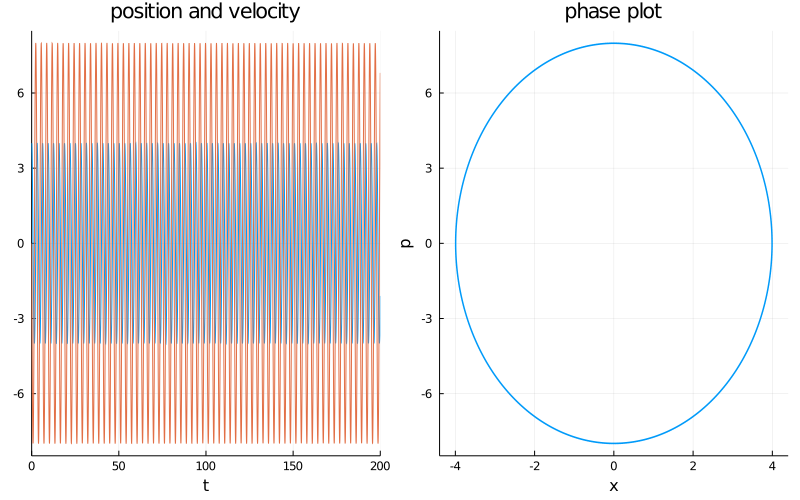

In [55]:
evol = plot(sol,legend=false,title="position and velocity")
phase = plot(sol,vars=(1,2),legend=false,title="phase plot",xlabel="x",ylabel="p")
plot(evol,phase,layout=(1,2),size=(800,500))

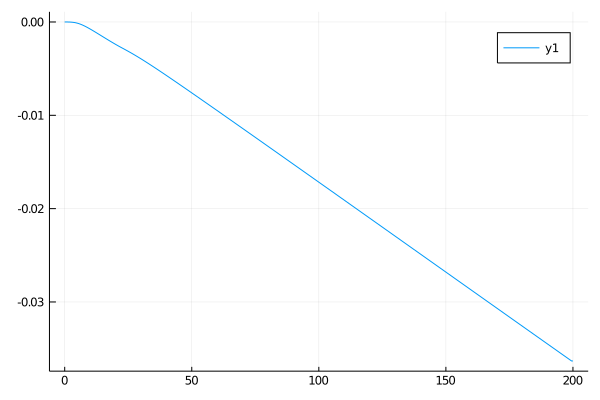

In [56]:
E(x,dx,p) = 1//2 * 2p[2] * x^2 + 1//2 * dx^2
Energy = map(u->E(u[1],u[2],p),sol.u)
plot(sol.t,Energy.-Energy[1])